# Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = 'chat_pp_sample.csv'

# Dataframe setup

In [3]:
df = pd.read_csv(path, index_col=0)

In [4]:
with open(path, 'r') as file :
  data = file.readlines()

#import pandas as pd

In [5]:
!pip3 install matplotlib
!pip3 install seaborn

## Date vs Count

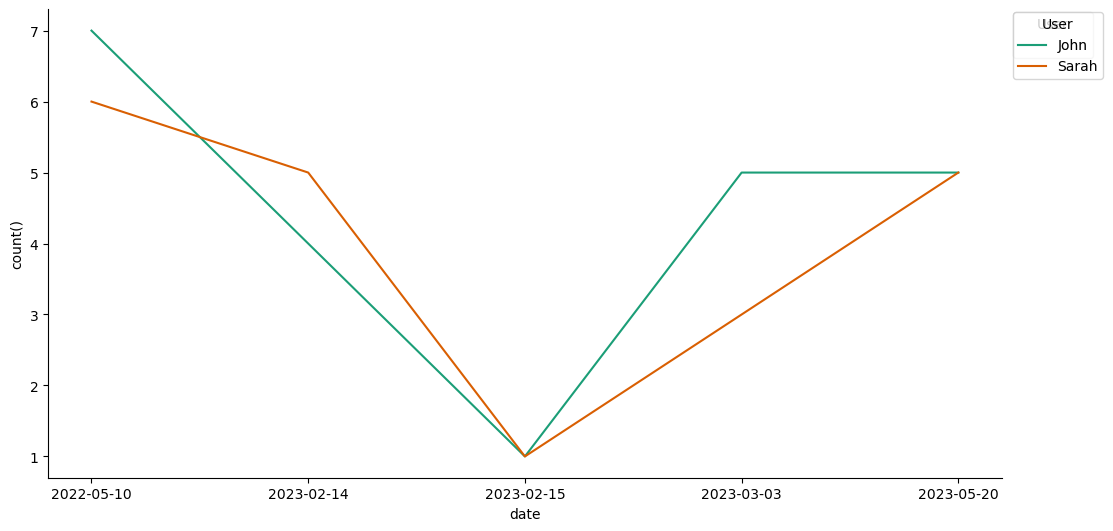

In [6]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='User', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

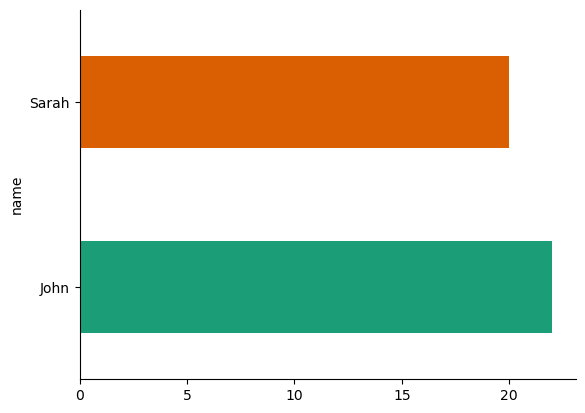

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Distribution of message over time

In [45]:
# Convert 'date' column to datetime
#df['datetime'] = pd.to_datetime(df['date'], format='mixed')
df['datetime'] = pd.to_datetime(df['date'])

In [54]:
# Save image file:
plt.savefig("ribution of Messages Sent Over relationship.jpg") 


<Figure size 640x480 with 0 Axes>

In [20]:
!pip install textblob

In [80]:
newdf=df

In [81]:
from collections import Counter
import matplotlib.pyplot as plt


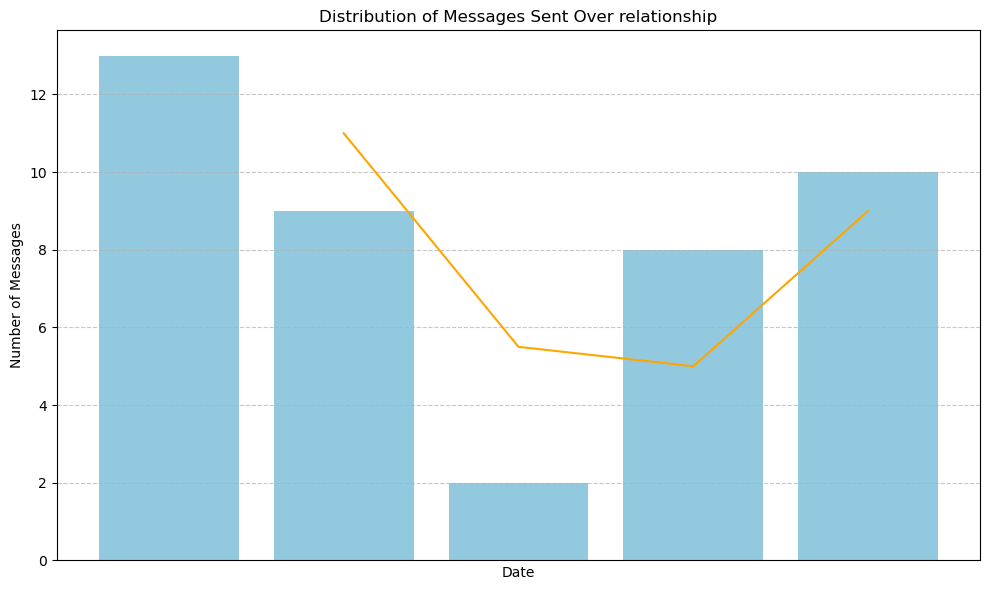

In [93]:
message_count = df.groupby('date').size()
moving_average_30d = message_count.rolling(window=2).mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=message_count.index, y=message_count.values, color='skyblue')
plt.plot(moving_average_30d.index, moving_average_30d.values, color='orange', label='Moving Average (30-day)')
plt.title('Distribution of Messages Sent Over relationship')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.xticks([])  # Hide x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Distribution of the Message.jpg")
plt.show()

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
#newdf=newdf.apply(lambda x: x.lower().split())
#newdf=newdf.drop(columns=['import'])
print(newdf)

                                               import        date        time  \
0   2022-05-10, 08:30 p.m. - John: Hey love, just ...  2022-05-10  08:30 p.m.   
1   2022-05-10, 08:31 p.m. - Sarah: Aww, you alway...  2022-05-10  08:31 p.m.   
2   2022-05-10, 08:32 p.m. - John: I miss you too,...  2022-05-10  08:32 p.m.   
3   2022-05-10, 08:33 p.m. - Sarah: Remember when ...  2022-05-10  08:33 p.m.   
4   2022-05-10, 08:34 p.m. - John: Yes, I will nev...  2022-05-10  08:34 p.m.   
5   2022-05-10, 08:35 p.m. - Sarah: I wish we coul...  2022-05-10  08:35 p.m.   
6   2022-05-10, 08:36 p.m. - John: Me too, my love...  2022-05-10  08:36 p.m.   
7   2022-05-10, 08:37 p.m. - Sarah: You're my rock...  2022-05-10  08:37 p.m.   
8   2022-05-10, 08:38 p.m. - John: And you're my g...  2022-05-10  08:38 p.m.   
9   2022-05-10, 08:39 p.m. - Sarah: Let's promise ...  2022-05-10  08:39 p.m.   
10  2022-05-10, 08:40 p.m. - John: I promise, my l...  2022-05-10  08:40 p.m.   
11  2022-05-10, 08:41 p.m. -

In [173]:
#vectorizer=TfidfVectorizer(max_features=2000)
#features=vectorizer.fit_transform(newdf)
#X_train, X_test, y_train, y_test= train_test_split(features, test_size=0.2, random_state=123)


In [175]:
from textblob import TextBlob
import nltk
nltk.download('punkt')




#text=' '.join(newdf['message_text'])
#text=nltk.word_tokenize(newdf['message_text'])
#blob=TextBlob(text)
#sentiment=blob.sentiment
#print(sentiment)
#Sentiment(polarity=0.3482815557729941, subjectivity=0.593085453359426)
#sentiments=[TextBlob(doc).sentiment.polarity for doc in newdf]
#sentiment_counts=Counter(sentiments)
#print(sentiments)
#sentiments_labels=sentiment_counts.keys()
#print(sentiments_labels)
#sentiment_values=sentiment_counts.values()
#tempt=sentiment_values
#plt.pie(tempt,labels=sentiments_labels, autopct="%1.1f%%")
#plt.title("Sentiment Distribution")
#plt.show()

[nltk_data] Downloading package punkt to /Users/razy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [179]:
text=''.join(newdf['message_text'])
blob=TextBlob(text)
sentiment=blob.sentiment
print(sentiment)

Sentiment(polarity=0.3207223567393058, subjectivity=0.5846650524616627)


In [176]:
#tokenized_text=[]
#for text in newdf['message_text']:
 #   tokk=nltk.word_tokenize(text)
  #  tokenized_text.append(tokk)
#print(tokenized_text)
#text=nltk.word_tokenize(newdf['message_text'])

In [180]:
#blob=TextBlob(tokenized_text)
#seetiment=blob.sentiment
#print(sentiment)
#(wokenized_text)

In [155]:
import nltk
!pip install tqdm
import tqdm
import time
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
#print(newdf['import'])
result=sia.polarity_scores(text)
print(result)

{'neg': 0.047, 'neu': 0.57, 'pos': 0.383, 'compound': 0.9998}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/razy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [148]:
#print(newdf.head(3))
#res={}
#for i, row in tqdm.(newdf.iterrows(), total=len(newdf)):
  #  text=row['import']

#frq= I love you, love, baby, index save in a list
# write in function input=datF, token, output= id or indecies




In [154]:
tokenn='love'
#indecies=newdf[newdf['message_text'].str.contains(tokenn)].index
#print(indecies)
def milestone(newdf,tokenn):
    return newdf[newdf['message_text'].str.contains(tokenn)].index
#print(newdf.head(10))
indecies=milestone(newdf,tokenn)
print(indecies)

Int64Index([0, 6, 10, 23, 24, 29], dtype='int64')
